In [5]:
# -*- coding: utf-8 -*-
"""
 OCNS 2019, Dendritic Computations
 How inputs interact
"""
from neuron import h, gui
from matplotlib import pyplot

#Simulation parameters	
h.tstop=100 		        #ms
h.dt=0.1			        #ms
h.steps_per_ms=10		#For plotting-should be compartible with dt
h.v_init=-65

In [9]:
#------------------------------------------------------
#========== Create a soma and two dendrites. Connect them.
soma=h.Section(name='soma')
dend0, dend1, dend2,dend3 = [h.Section(name=n) for n in ['dend0', 'dend1', 'dend2', 'dend3']]

# Define properties of soma
soma.diam = 20	#um
soma.L = 200    	#um
soma.Ra = 100         # Axial resistance in Ohm * cm
soma.cm = 1		      #specific membrane capacitance, capacitance per unit of membrane, uF/cm^2   
soma.nseg=1	
		
soma.insert('hh')
for seg in soma: 
    seg.hh.gnabar = 0.05  # Sodium conductance in S/cm2
    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -65       # Reversal potential in mV

# Define properties of dend0
dend0.diam = 5
dend0.L = 500
dend0.nseg=11
dend0.cm = 1
dend0.Ra = 100

dend0.insert('pas')      #Insert passive (leak) channels
for seg in dend0:
    seg.pas.e= -65
    seg.pas.g= 0.0003
	
# Define properties of dend1
dend1.diam = 3
dend1.L = 200
dend1.nseg=13
dend1.cm = 1
dend1.Ra = 100

dend1.insert('pas')      #Insert passive (leak) channels
for seg in dend1:
    seg.pas.e= -65
    seg.pas.g= 0.0003
    
# Define properties of dend0
dend2.diam = 5
dend2.L = 500
dend2.nseg=11
dend2.cm = 1
dend2.Ra = 100

dend2.insert('pas')      #Insert passive (leak) channels
for seg in dend2:
    seg.pas.e= -65
    seg.pas.g= 0.0003
	
# Define properties of dend1
dend3.diam = 3
dend3.L = 200
dend3.nseg=13
dend3.cm = 1
dend3.Ra = 100

dend3.insert('pas')      #Insert passive (leak) channels
for seg in dend3:
    seg.pas.e= -65
    seg.pas.g= 0.0003
    

dend0.connect(soma(0),0)        #Connect the 0 point of dendrite 0 to the zero point of the soma
dend1.connect(dend0(1),0)  
dend2.connect(soma(1),0)  
dend3.connect(dend2(1),0) 

dend3

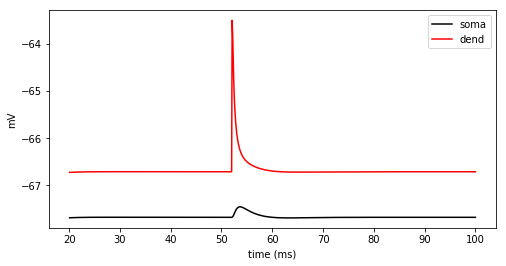

Somatic depolarization is  0.24  mV
Distal Dendritic depolarization is 3.23 mV


In [10]:
#------------------------------------------------------
#========== Synaptic stimulation.
#Place the synapse to the middle (0.5) of the soma, ...
Syn=h.ExpSyn(dend1(0.5))
Syn.e=0                     #Reverse potential of the synapse (mV)

#Place the synapse to the middle (0.5) of the soma, ...
Syn1=h.ExpSyn(dend3(0.5))
Syn1.e=0   
#========== ...create an artificial spike (an "event" to be delivered to the synapse)...
ns=h.NetStim(0.5)
ns.start = 50      
ns.number = 1  

#... and connect the event to the synapse.
nc = h.NetCon(ns,Syn, -10, 2, 0.008*1)
nc1 = h.NetCon(ns,Syn1, -10, 2, 0.008*1)
#Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (dendrite[1])
vsoma_vec = h.Vector()        # Membrane potential vector
vdend1_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()        # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

h.run()

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
soma_plot = pyplot.plot(t_vec, vsoma_vec, color='black')
dend_plot = pyplot.plot(t_vec, vdend1_vec, color='red')
pyplot.legend(soma_plot + dend_plot, ['soma', 'dend'])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()


print ('Somatic depolarization is ',  round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Distal Dendritic depolarization is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')
